# VGGNet

<p align="center"><img src=https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png>

\begin{equation*}

\underbrace{{CNN}^2 \rightarrow MP}_\textrm{Layer 1,2} \rightarrow 
\underbrace{{CNN}^2 \rightarrow MP}_\textrm{Layer 3,4} \rightarrow 
\underbrace{{CNN}^3 \rightarrow MP}_\textrm{Layer 5,6,7} \rightarrow 
\underbrace{{CNN}^3 \rightarrow MP}_\textrm{Layer 8,9,10} \rightarrow 
\underbrace{{CNN}^3 \rightarrow MP}_\textrm{Layer 11,12,13} \rightarrow 
\underbrace{ {(FC  \rightarrow DO)}^2}_\textrm{Layer 14,15} \rightarrow 
\underbrace{ Linear }_\textrm{Layer 16} \rightarrow softmax

\end{equation*}


<center>

| Oper       | Datos                       | Activ. Func|  Notas |
|:----------:|:---------------------------:|:----------:|:------:|
| Conv1      | #k=64,  ks=3x3, s=1, p=1    | relu       |        |
| Conv2      | #k=64,  ks=3x3, s=1, p=1    | relu       |        |
| MaxPool    | ks=2x2, s=2                 |            |        |
| Conv3      | #k=128, ks=3x3, s=1, p=1    | relu       |        |
| Conv4      | #k=128, ks=3x3, s=1, p=1    | relu       |        |
| MaxPool    | ks=2x2, s=1                 |            |        |
| Conv5      | #k=256, ks=3x3, s=1, p=1    | relu       |        |
| Conv6      | #k=256, ks=3x3, s=1, p=1    | relu       |        |
| Conv7      | #k=256, ks=3x3, s=1, p=1    | relu       |        |
| MaxPool    | ks=2x2, s=2                 |            |        |
| Conv8      | #k=512, ks=3x3, s=1, p=1    | relu       |        |
| Conv9      | #k=512, ks=3x3, s=1, p=1    | relu       |        |
| Conv10     | #k=512, ks=3x3, s=1, p=1    | relu       |        |
| MaxPool    | ks=2x2, s=2                 |            |        |
| Conv11     | #k=512, ks=3x3, s=1, p=1    | relu       |        |
| Conv12     | #k=512, ks=3x3, s=1, p=1    | relu       |        |
| Conv13     | #k=512, ks=3x3, s=1, p=1    | relu       |        |
| MaxPool    | ks=2x2, s=2                 |            |        |
| FC1        | 4096                        | relu       |        |
| Dropout    | p=0.5                       |            |        |
| FC2        | 4096                        | relu       |        |
| Dropout    | p=0.5                       |            |        |
| FC3        | 1000                        | softmax    |        |

</center>

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
from utils import get_dataset, imshow, get_default_device, create_directory, save_model
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 10)
import torch.optim as optim
from utils import train

In [2]:
import gc
torch.cuda.empty_cache()
gc.collect()

9

In [3]:
import gc

for i in range(10):    
    torch.cuda.empty_cache()
    gc.collect()

class vggnet16(nn.Module):
    def __init__(self, num_classes):
        super(vggnet16, self).__init__()
                
        self.maxpool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.5)
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
        self.adaptative = nn.AdaptiveAvgPool2d((1))

        self.conv1 = nn.Conv2d(3, 64, 3, 1, 1)
        self.conv2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv5 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv6 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv7 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8 = nn.Conv2d(256, 512, 3, 1, 1)
        self.conv9 = nn.Conv2d(512, 512, 3, 1, 1)
        self.conv10 = nn.Conv2d(512, 512, 3, 1, 1)
        self.conv11 = nn.Conv2d(512, 512, 3, 1, 1)
        self.conv12 = nn.Conv2d(512, 512, 3, 1, 1)
        self.conv13 = nn.Conv2d(512, 512, 3, 1, 1)
        self.conv14 = nn.Conv2d(512, 1024, 3, 1, 1)

        self.fc1 = nn.Linear(1024, num_classes)

        #self.fc2 = nn.Linear(4096, 4096)
        #self.fc3 = nn.Linear(4096, num_classes)
        
        # intializing weights
        self.initialize_weights()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        #x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        
        x = self.relu(self.conv3(x))
        #x = self.relu(self.conv4(x))
        x = self.maxpool(x)
        
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        #x = self.relu(self.conv7(x))
        x = self.maxpool(x)
        
        x = self.relu(self.conv8(x))
        x = self.relu(self.conv9(x))
        #x = self.relu(self.conv10(x))
        x = self.maxpool(x)
        
        x = self.relu(self.conv11(x))
        x = self.relu(self.conv12(x))
        #x = self.relu(self.conv13(x))
        x = self.maxpool(x)

        
        x = self.relu(self.conv14(x))
        x = self.maxpool(x)
        x = self.adaptative(x)
        
        x = torch.flatten(x, 1)
        x = self.softmax(self.dropout(self.fc1(x)))
        #x = self.relu(self.dropout(self.fc2(x)))
        #x = self.softmax(self.fc3(x))
        
        return x
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, torch.nn.Conv2d):
                torch.nn.init.kaiming_uniform_(m.weight)
                if m.bias is not None:
                    torch.nn.init.constant_(m.bias, 0)
                        
            elif isinstance(m, torch.nn.BatchNorm2d):
                torch.nn.init.constant_(m.weight, 1)
                torch.nn.init.constant_(m.bias, 1)
                    
            elif isinstance(m, torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight)
                torch.nn.init.constant_(m.bias, 0)


device = get_default_device()
print(device)


NUM_CLASSES = 10 #102
IMG_SIZE = 224
BATCH_SIZE = 32 #128

model = vggnet16(NUM_CLASSES).to(device)

# testing
input = torch.rand([BATCH_SIZE,3,IMG_SIZE,IMG_SIZE]).to(device)
out = model(input)
print("input shape:", input.shape)
print("output shape:", out.shape)

cuda
torch.Size([32, 1024, 1, 1])
input shape: torch.Size([32, 3, 224, 224])
output shape: torch.Size([32, 10])


In [ ]:
import gc

for i in range(30):    
    torch.cuda.empty_cache()
    gc.collect()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = nn.DataParallel(model, device_ids=[0, 1, 2])
model.to(device)

Files already downloaded and verified
Files already downloaded and verified


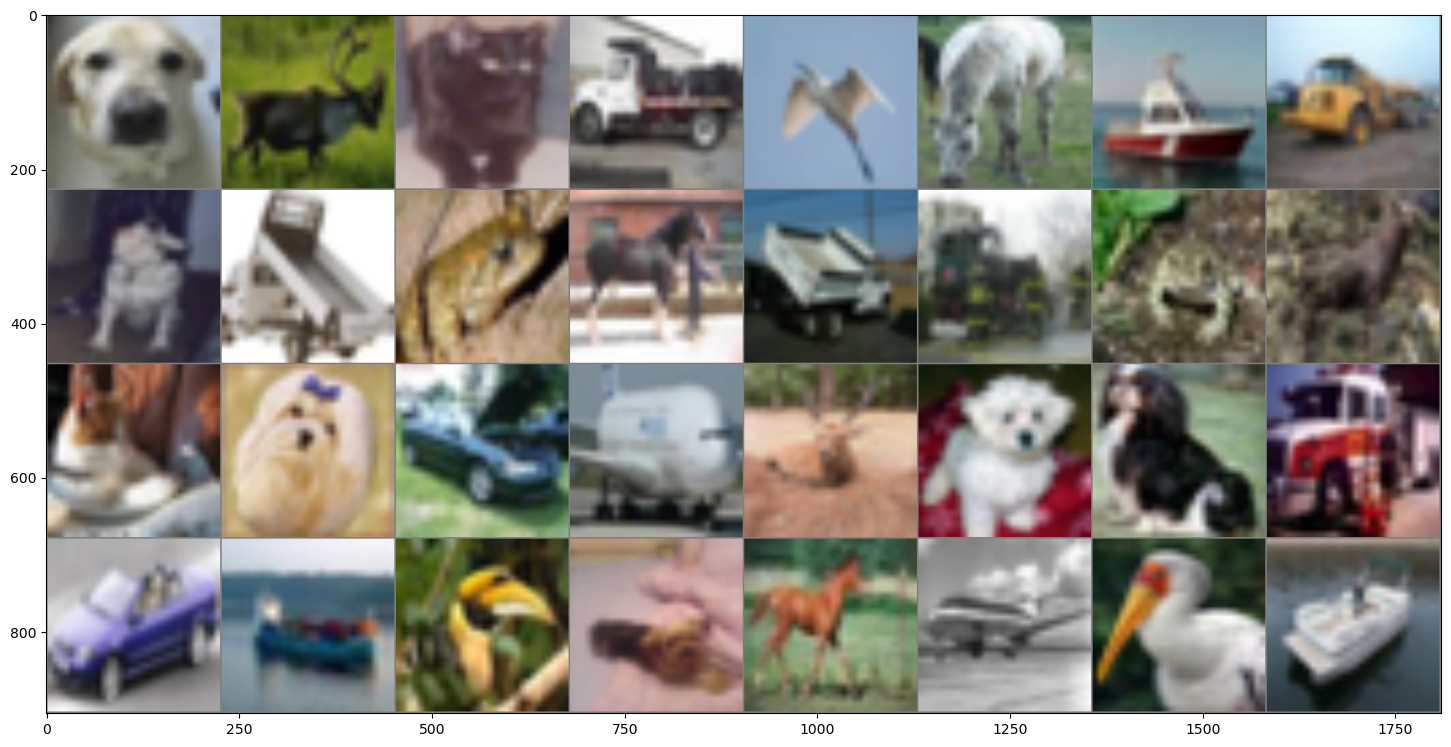

Device: cuda
######### Starting Training ########
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 1, 1])
torch.Size([32, 1024, 

KeyboardInterrupt: 

In [4]:
data_transforms = [
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # Scales data into [0,1]
    transforms.Lambda(lambda t: (t * 2) - 1) # Scale between [-1, 1]
]

trainloader, testloader = get_dataset(dataset_name='cifar10', transform=data_transforms, batchsize = BATCH_SIZE)
imshow(testloader)

device = get_default_device()
#device = torch.device('cpu')

trained_model = train(net=model,
                    epochs=10,
                    trainloader = trainloader,
                    criterion = nn.CrossEntropyLoss(),
                    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9),
                    device = device,
                    every_n_epochs = 1)

In [ ]:
PATH = './trained_models/vggnet'
create_directory(PATH)
save_model(PATH, model=trained_model, weights='vggnet16.pth')